In [125]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from pathlib import Path
import importlib
import time
import polars as pl
import warnings
warnings.filterwarnings("ignore")  # Oculta todos los warnings

# Mis modulos
import get_data as gd
import data_analysis as da

In [126]:
# import pyfiglet
# print(pyfiglet.figlet_format("Analisis Alcance de Cuota"))

banner = r"""
    _                _ _     _          _    _                          
   / \   _ __   __ _| (_)___(_)___     / \  | | ___ __ _ _ __   ___ ___ 
  / _ \ | '_ \ / _` | | / __| / __|   / _ \ | |/ __/ _` | '_ \ / __/ _ \
 / ___ \| | | | (_| | | \__ \ \__ \  / ___ \| | (_| (_| | | | | (_|  __/
/_/   \_\_| |_|\__,_|_|_|___/_|___/ /_/   \_\_|\___\__,_|_| |_|\___\___|
                                                                        
     _         ____            _        
  __| | ___   / ___|   _  ___ | |_ __ _ 
 / _` |/ _ \ | |  | | | |/ _ \| __/ _` |
| (_| |  __/ | |__| |_| | (_) | || (_| |
 \__,_|\___|  \____\__,_|\___/ \__\__,_|

        💥 GENERADOR DE ANALISIS AUTOMATICO DE ALCANCE DE CUOTA 💥
"""

print(banner, end='\n\n')
time.sleep(1)


    _                _ _     _          _    _                          
   / \   _ __   __ _| (_)___(_)___     / \  | | ___ __ _ _ __   ___ ___ 
  / _ \ | '_ \ / _` | | / __| / __|   / _ \ | |/ __/ _` | '_ \ / __/ _ \
 / ___ \| | | | (_| | | \__ \ \__ \  / ___ \| | (_| (_| | | | | (_|  __/
/_/   \_\_| |_|\__,_|_|_|___/_|___/ /_/   \_\_|\___\__,_|_| |_|\___\___|

     _         ____            _        
  __| | ___   / ___|   _  ___ | |_ __ _ 
 / _` |/ _ \ | |  | | | |/ _ \| __/ _` |
| (_| |  __/ | |__| |_| | (_) | || (_| |
 \__,_|\___|  \____\__,_|\___/ \__\__,_|

        💥 GENERADOR DE ANALISIS AUTOMATICO DE ALCANCE DE CUOTA 💥




### Configuracion

In [127]:
# Constantes usadas en el notebook
TODAY = datetime.today().strftime('%d-%m-%Y')
MAPI = "MAPI" # Messaging Application Programming Interface
DOT = "."
OUTLOOK = "Outlook"
APPLICATION = "Application"
ROOT_ADDRESS = r'C:\Informacion\Alcance de Cuota' # Direcccion de carpeta raiz
PROJECT_ADDRESS = r"C:\Informacion\Alcance de Cuota\analisis_alcance_cuota"

MAIL_TO = ''
MAIL_CC = 'contabilidad@ayacda.com;adm@ayacda.com;gcamana@ayacda.com;rgallegos@aclogistica.pe;gportocarrerob@unsa.edu.pe;'

TEST_MAIL_TO = "ainformacion@ayacda.com;gportocarrerob@unsa.edu.pe;"
TEST_MAIL_CC = ";"

ALCANCE_CUOTA = {
    "name": "Alcance de Cuota",
    "file_name": os.path.join(ROOT_ADDRESS, 'ALCANCE DE CUOTA 2025.xlsx'), # Nombre del archivo de Excel,
    "sheet_name": 'AC TAB', # Nombre de la hoja de Excel
    "csv_file_name": os.path.join(PROJECT_ADDRESS, "alcance_cuota.csv"), # Nombre del archivo CSV
    "relevant_columns": [
        'FECHA',
        'AÑO',
        'MES',
        'SEDE',
        'CONCEPTO',
        'CU',
        'CF',
    ],
}

# Diccionarios
outlook_folder_codes = {
    0: 'Calendario',
    1: 'Contactos',
    2: 'Borradores',
    3: 'Diario / Jornal',
    4: 'Notas',
    5: 'Tareas',
    6: 'Bandeja de entrada',
    7: 'Bandeja de salida',
    8: 'Elementos enviados',
    9: 'Elementos eliminados',
    10: 'Bandeja de correo del servidor',
    11: 'Conflictos',
    12: 'Elementos de sincronizacion local',
    13: 'Elementos de sincronizacion (Envio)',
    14: 'Elementos de sincronización (Recibo)',
    15: 'Elementos de sincronización completa',
    16: 'Diario de formularios',
    17: 'Carpeta de búsqueda',
    18: 'Bandeja para reglas cliente',
    19: 'Carpeta de sugerencias de correo',
}
outlook_object_types = {
    "AppointmentItem": 26,
    "MailItem": 43,
    "TaskItem": 46,
    "ContactItem": 48,
    "MeetingItem": 53,
}
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
    11: 'Noviembre', 12: 'Diciembre'
}

# Listas
locaciones = ['PEDREGAL', 'ATICO', 'CHALA', 'CAMANA']

### Obtencion de datos

In [128]:
importlib.reload(gd)

df = gd.get_clean_data(ALCANCE_CUOTA)
print(df.schema)
print(df.shape)

Schema({'FECHA': String, 'AÑO': Int64, 'MES': String, 'SEDE': String, 'CONCEPTO': String, 'CU': Float64, 'CF': Float64})
(204, 7)


### Filtro de datos

In [129]:
year = int(input("\n>> Ingresa año (yyyy): "))

print("\nSelecciona locacion/es:")
print(f"  [1] Todas")
print(f"  [2] {locaciones[0]}")
print(f"  [3] {locaciones[1]}")
print(f"  [4] {locaciones[2]}")
print(f"  [5] {locaciones[3]}\n")

location_option = int(input(">> Opción (1 - 5): "))

if location_option == 1:
    filtered_locaciones = locaciones
else:
    filtered_locaciones = [locaciones[location_option - 2]]


Selecciona locacion/es:
  [1] Todas
  [2] PEDREGAL
  [3] ATICO
  [4] CHALA
  [5] CAMANA



In [130]:
importlib.reload(gd)

df_year = gd.get_specific_year(df, year)
df_location = gd.get_specific_location(df_year, filtered_locaciones)

df_filtered = df_location

### Analisis

In [137]:
print(df_filtered)

shape: (48, 7)
┌─────────────────────┬──────┬───────┬──────────┬─────────────────────┬─────────────┬────────────┐
│ FECHA               ┆ AÑO  ┆ MES   ┆ SEDE     ┆ CONCEPTO            ┆ CU          ┆ CF         │
│ ---                 ┆ ---  ┆ ---   ┆ ---      ┆ ---                 ┆ ---         ┆ ---        │
│ str                 ┆ i64  ┆ str   ┆ str      ┆ str                 ┆ f64         ┆ f64        │
╞═════════════════════╪══════╪═══════╪══════════╪═════════════════════╪═════════════╪════════════╡
│ 2025-01-01 00:00:00 ┆ 2025 ┆ ENERO ┆ ATICO    ┆ BEBIDA              ┆ 39858.0     ┆ 23638.0    │
│ 2025-01-01 00:00:00 ┆ 2025 ┆ ENERO ┆ CAMANA   ┆ BEBIDA              ┆ 180449.0    ┆ 112478.0   │
│ 2025-01-01 00:00:00 ┆ 2025 ┆ ENERO ┆ CHALA    ┆ BEBIDA              ┆ 131352.0    ┆ 73216.0    │
│ 2025-01-01 00:00:00 ┆ 2025 ┆ ENERO ┆ PEDREGAL ┆ BEBIDA              ┆ 108232.0    ┆ 64481.0    │
│ 2025-01-01 00:00:00 ┆ 2025 ┆ ENERO ┆ ATICO    ┆ BEBIDAS ALCOHOLICAS ┆ 203.946027  ┆ 488.6666

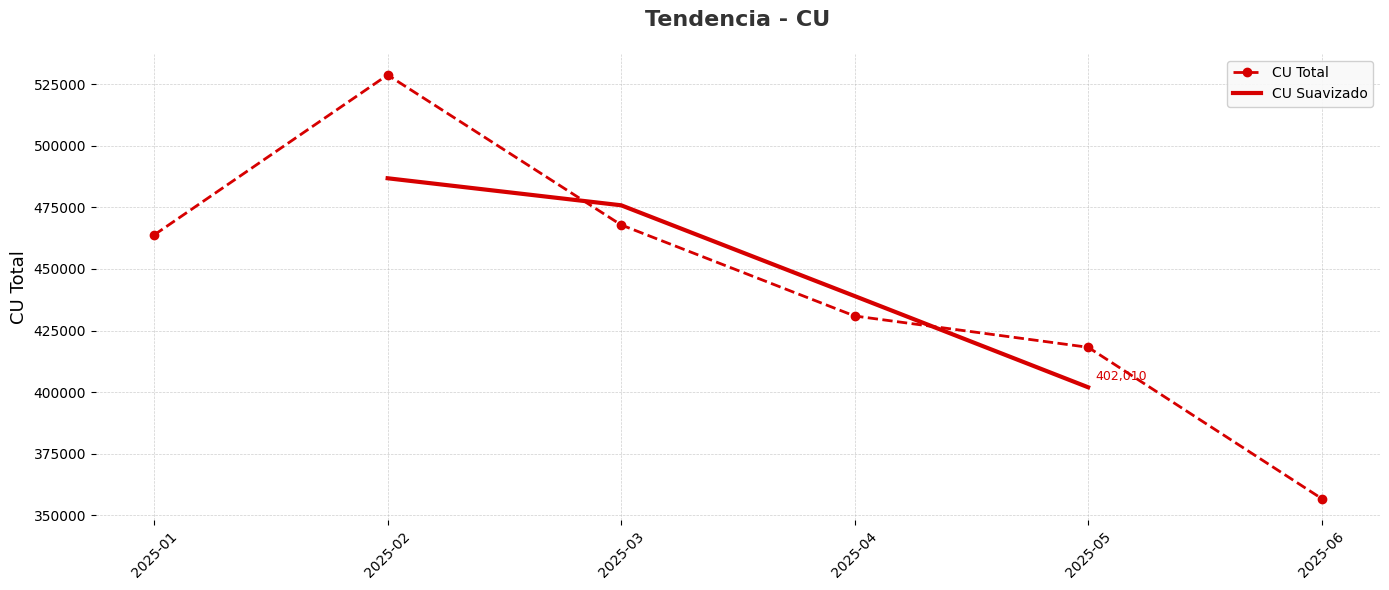

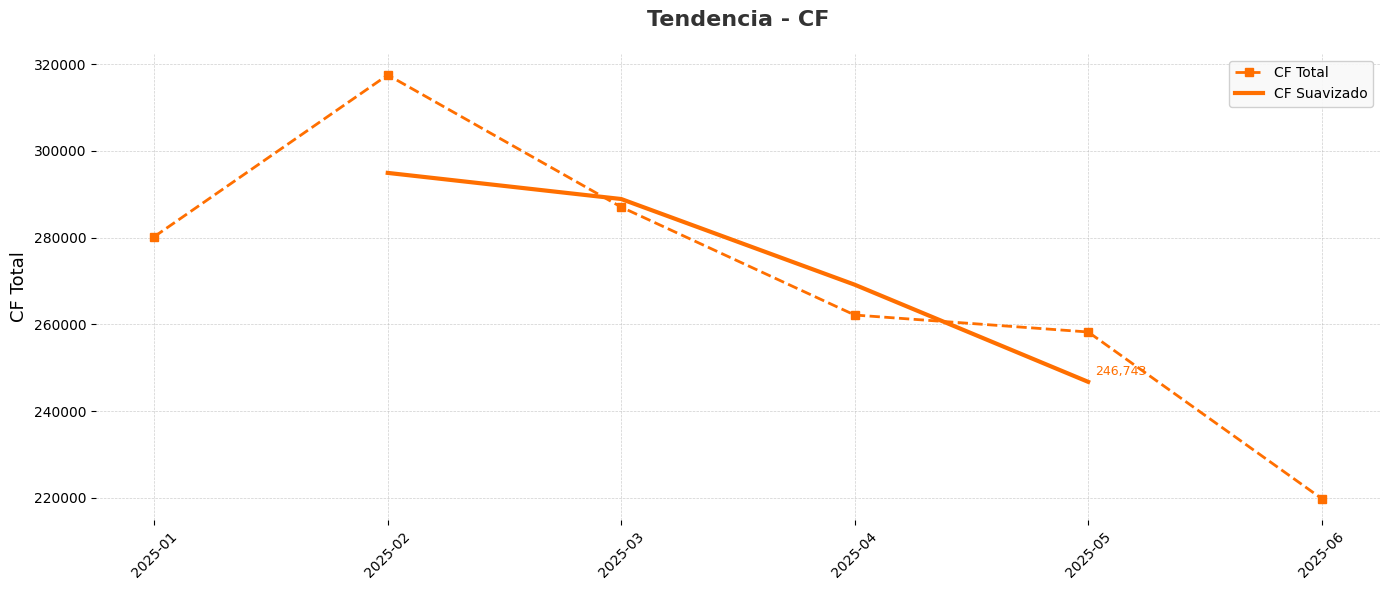

In [ ]:
importlib.reload(da)

# 1. Análisis temporal
da.analisis_temporal(df_filtered)

# 2. Análisis estadístico
da.analisis_estadistico(df_filtered)

# 3. Análisis comparativo
da.analisis_comparativo(df_filtered)

# 4. Tendencias y estacionalidad
da.analisis_tendencia_estacionalidad(df_filtered)

### Export it as .py

In [132]:
import nbformat
from nbconvert import PythonExporter

# Cargar el notebook
notebook_path = "main.ipynb"
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Eliminar la última celda
nb['cells'] = nb['cells'][:-1]

# Convertir a script .py
exporter = PythonExporter()
codigo_python, _ = exporter.from_notebook_node(nb)

# Guardar el archivo .py
with open("main.py", "w", encoding="utf-8") as f:
    f.write(codigo_python)

print("✅ Archivo .py creado sin la última celda.")

✅ Archivo .py creado sin la última celda.
